<a href="https://colab.research.google.com/github/BrianBehnke/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/module3-gradient-descent/Gradient_Descent_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent Implementation Challenge!!

## Use gradient descent to find the optimal parameters of a **multiple** regression model. (We only showed an implementation for a bivariate model during lecture.)

A note: Implementing gradient descent in any context is not trivial, particularly the step where we calculate the gradient will change based on the number of parameters that we're trying to optimize for. You will need to research what the gradient of a multiple regression model looks like. This challenge is pretty open-ended but I hope it will be thrilling. Please work together, help each other, share resources and generally expand your understanding of gradient descent as you try and achieve this implementation. 

## Suggestions:

Start off with a model that has just two $X$ variables You can use any datasets that have at least two x variables. Potential candidates might be the blood pressure dataset that we used during lecture on Monday: [HERE](https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/excel/mlr02.xls) or any of the housing datasets. You would just need to select from them the two varaibles $x$ variables and one y variable that you want to work with that you most want to work with. 

Use Sklearn to find the optimal parameters of your model first. (like we did during the lecture.) So that you can compare the parameter estimates of your gradient-descent linear regression to the estimates of OLS linear regression. If implemented correctly they should be nearly identical.

Becoming a Data Scientist is all about striking out into the unknown, getting stuck and then researching and fighting and learning until you get yourself unstuck. Work together! And fight to take your own learning-rate fueled step towards your own optimal understanding of gradient descent! 


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [28]:
# # Read Data
df = pd.read_excel('https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/excel/mlr02.xls')
df.head()

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,X1,X2,X3
0,132,52,173
1,143,59,184
2,153,67,194
3,162,73,211
4,154,64,196


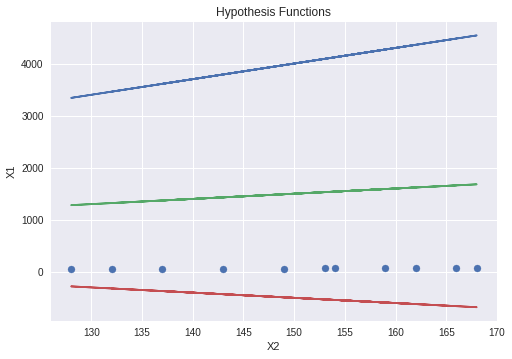

In [29]:
# Creat Scatterplot
plt.scatter(df.X1, df.X2)

X = df.X1[:, np.newaxis]
y = df.X2

# Create Hypothesis Function Lines
h1 = [30*x - 500 for x in X]
h2 = [10*x + 0 for x in X]
h3 = [-10*x + 1000 for x in X]
plt.plot(X, h1)
plt.plot(X, h2)
plt.plot(X, h3)
# plt.plot(x_value, prediction, 'ro')

# Graph axes and title
plt.ylabel("X1")
plt.xlabel("X2")
plt.title("Hypothesis Functions")

# Plot Hypothesis Functions
plt.show();

0.6546068735924802
-35.795995300107705


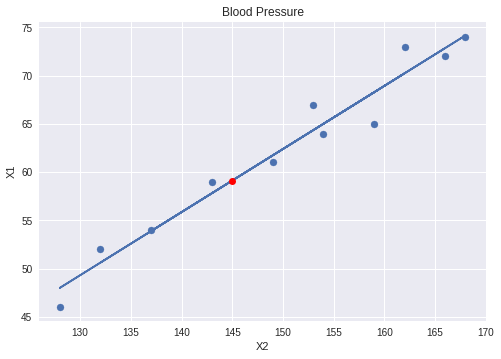

In [31]:
# Fit Model
model = LinearRegression()
model.fit(X, y)

# Assign coefficient and intercept to variables (beta_1, and beta_0)
beta_1 = model.coef_[0]
beta_0 = model.intercept_

print(beta_1)
print(beta_0)

# Make a single prediction for 145 X2
x_value = 145

# Calculate predicted value
prediction = beta_1*x_value + beta_0

# Creat Scatterplot
plt.scatter(df.X1, df.X2)

# Plot the Regression Line and predicted value
y_hat = [beta_1*x + beta_0 for x in X]
plt.plot(X, y_hat)
plt.plot(x_value, prediction, 'ro')

# Graph axes and title
plt.ylabel("X1")
plt.xlabel("X2")
plt.title("Blood Pressure")

# Plot the error (residual)
plt.arrow(55.2, 600, 0, 150, color='black')
plt.show();

1879.5993000000024
1121.081700000001
562.2897000000004
203.2232999999999
43.88250000000005
84.26730000000028
324.377699999999
764.2136999999994
1403.775299999999


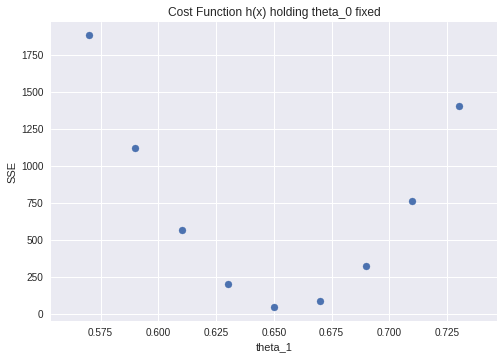

In [33]:
# Define a function that can calculate SSE for any hypothesis function
# print(X)
# print(y)

def SSE(theta_0, theta_1, y, X):
  squared_residuals = []
  for index, value in enumerate(y):
    h_x = theta_0 + theta_1*X[index][0]
    residual = h_x - value
    squared_residual = residual**2
    squared_residuals.append(squared_residual)
  return sum(squared_residuals)
    
SSE_1 = SSE(-36, .57, y, X)
SSE_2 = SSE(-36, .59, y, X)
SSE_3 = SSE(-36, .61, y, X)
SSE_4 = SSE(-36, .63, y, X)
SSE_5 = SSE(-36, .65, y, X)
SSE_6 = SSE(-36, .67, y, X)
SSE_7 = SSE(-36, .69, y, X)
SSE_8 = SSE(-36, .71, y, X)
SSE_9 = SSE(-36, .73, y, X)

print(SSE_1)
print(SSE_2)
print(SSE_3)
print(SSE_4)
print(SSE_5)
print(SSE_6)
print(SSE_7)
print(SSE_8)
print(SSE_9)

plt.scatter([.57,.59,.61,.63,.65,.67,.69,.71,.73], [SSE_1, SSE_2, SSE_3, SSE_4, SSE_5, SSE_6, SSE_7, SSE_8, SSE_9])
plt.title("Cost Function h(x) holding theta_0 fixed")
plt.xlabel('theta_1')
plt.ylabel('SSE');

In [37]:
## Lets implement it and see how close GD comes to sklearn!
# Lets Implement it!!!
# First we'll calculate our parameters using sklearn to see how close our 
# Gradient Descent Method gets. 

# Read Data
#df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ice_Cream_Sales.csv')

# Create X matrix and y vector
X = df['X1'].values[:, np.newaxis]

# If we don't do this our GD stuff will break
X = (X - X.mean()) / X.std()

# Matrix version makes cool linalg tricks possible
X_linalg = np.c_[np.ones(X.shape[0]), X] 

#print(X_linalg)

# Boring y variable list
y = df['X2'].values

# Fit Model
model = LinearRegression()
model.fit(X, y)

# Assign coefficient and intercept to variables (beta_1, and beta_0)
beta_1 = model.coef_[0]
beta_0 = model.intercept_

print("beta_1: ", beta_1)
print("beta_0: ", beta_0);

beta_1:  8.50510226387961
beta_0:  62.45454545454545


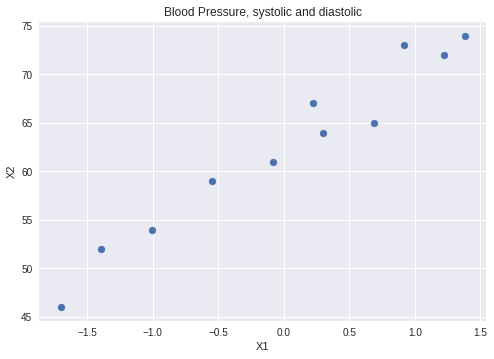

In [40]:
plt.scatter(X,y)

# Add axes and title
plt.ylabel("X2")
plt.xlabel("X1")
plt.title("Blood Pressure, systolic and diastolic")
plt.show();

In [0]:
# Initial Variables
alpha = .01
iterations = 2000
n = len(y)
np.random.seed(15)
theta = [0, 0]

In [43]:
prediction = np.dot(X_linalg, theta)
# print(X_linalg)
print(prediction)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [44]:
# print('y: \n', y)
error = prediction - y
print(error)

[-52. -59. -67. -73. -64. -74. -54. -61. -65. -46. -72.]


In [45]:
theta = theta - (alpha * (1/n) * np.dot(X.T, error))
# print((alpha * (1/n) * np.dot(X.T, error)))
print(theta)

[0.08505102 0.08505102]


In [46]:
# Put it all together
def gradient_descent(X, y, theta, iterations, alpha):
  for _ in range(iterations):
    prediction = np.dot(X, theta)
    error = prediction - y
    updates = (alpha * (1/n) * np.dot(X.T, error))
#     print(updates)
    theta = theta - updates
  return theta
  
gradient_descent(X_linalg, y, theta, iterations, alpha)

array([62.45454534,  8.50510225])

In [47]:
# We need to save all of our thetas so that we can make our animation

# Put it all together
def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*n) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/n) * np.dot(x.T, error))
        past_thetas.append(theta)
    return past_thetas, past_costs

past_thetas, past_costs = gradient_descent(X_linalg, y, theta, iterations, alpha)

final_theta = past_thetas[-1]

print("Gradient Descent Results: {:.5f}, {:.5f}".format(final_theta[0], final_theta[1]))

Gradient Descent Results: 62.45455, 8.50510


## Stretch Goals

If you happen upon the most useful resources for accomplishing this challenge first, I want you to spend time today studying other variations of Gradient Descent-Based Optimizers.

- Try and write a function that can perform gradient descent for arbitarily large (in dimensionality) multiple regression models. 
- Create a notebook for yourself exploring these topics
- How do they differ from the "vanilla" gradient descent we explored today
- How do these different gradient descent-based optimizers seek to overcome the challenge of finding the global minimum among various local minima?
- Write a blog post that reteaches what you have learned about these other gradient descent-based optimizers.

[Overview of GD-based optimizers](http://ruder.io/optimizing-gradient-descent/)

[Siraj Raval - Evolution of Gradient Descent-Based Optimizers](https://youtu.be/nhqo0u1a6fw)